
=== Method: L (Aggregated) ===
Node 0: Total=388389, Invalid=382127
Node 2: Total=16037, Invalid=15762
Node 3: Total=383523, Invalid=373318
Node 13: Total=270591, Invalid=267156
Node 14: Total=383112, Invalid=376508
Node 16: Total=392558, Invalid=387343
Node 18: Total=380704, Invalid=367861
Node 24: Total=399863, Invalid=390518
Node 29: Total=387665, Invalid=378380


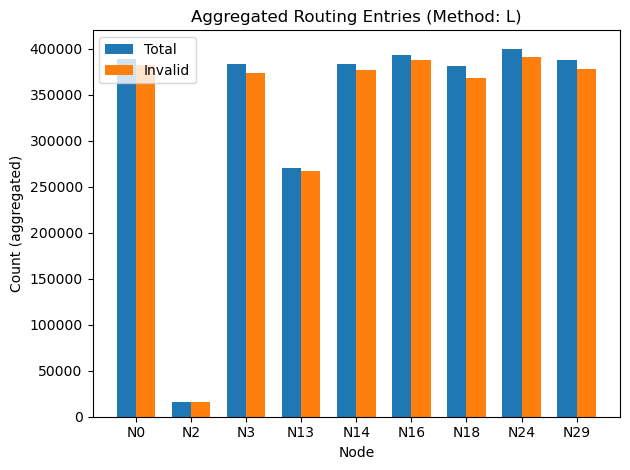


=== Method: P (Aggregated) ===
Node 0: Total=389743, Invalid=383352
Node 2: Total=381779, Invalid=373297
Node 3: Total=395993, Invalid=385703
Node 13: Total=266872, Invalid=263581
Node 14: Total=384381, Invalid=377715
Node 16: Total=389343, Invalid=384185
Node 18: Total=391212, Invalid=378066
Node 24: Total=406188, Invalid=396998
Node 29: Total=391074, Invalid=381616


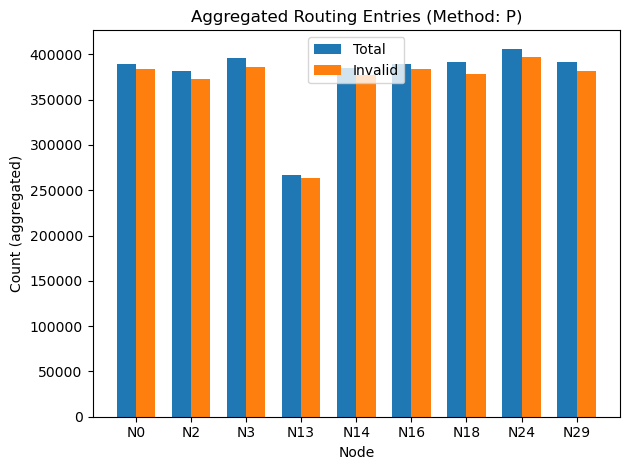

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

max_tx_dist = 50.0

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

position_log_path = "./vehicle_position_log.csv"
if not os.path.exists(position_log_path):
    print(f"Missing vehicle position log: {position_log_path}")
    exit(1)
df_pos_all = pd.read_csv(position_log_path)
time_list = sorted(df_pos_all["Time"].unique())

def parse_node_id(node_str):
    if isinstance(node_str, str) and "[" in node_str and "]" in node_str:
        return int(node_str.split("[")[1].split("]")[0])
    else:
        return None

for method in methods:
    print(f"\n=== Method: {method} (Aggregated) ===")
    totals, invalids, node_labels = [], [], []

    node_stats = {int(node[1:]): {"total": 0, "invalid": 0} for node in nodes}

    for target_time in time_list:
        df_pos = df_pos_all[df_pos_all["Time"] == target_time]
        if df_pos.empty:
            continue

        for node_folder in nodes:
            node_num = int(node_folder[1:])
            route_log_path = os.path.join(base_path, method, density, speed, node_folder, "routing_table_log.csv")
            
            if not os.path.exists(route_log_path):
                continue

            df_route = pd.read_csv(route_log_path)
            df_route = df_route[df_route["Time"] == target_time]
            if df_route.empty:
                continue

            for _, row in df_route.iterrows():
                next_id = parse_node_id(row["NextHop"])
                if next_id is None:
                    continue
                node_pos = df_pos[df_pos["Node"] == node_num]
                next_pos = df_pos[df_pos["Node"] == next_id]
                if node_pos.empty or next_pos.empty:
                    continue

                node_x, node_y = node_pos.iloc[0][["X", "Y"]]
                next_x, next_y = next_pos.iloc[0][["X", "Y"]]
                dist = sqrt((node_x - next_x)**2 + (node_y - next_y)**2)

                node_stats[node_num]["total"] += 1
                if dist > max_tx_dist:
                    node_stats[node_num]["invalid"] += 1

    for node_num in sorted(node_stats.keys()):
        t, inv = node_stats[node_num]["total"], node_stats[node_num]["invalid"]
        print(f"Node {node_num}: Total={t}, Invalid={inv}")
        totals.append(t)
        invalids.append(inv)
        node_labels.append(f"N{node_num}")

    if not totals:
        continue

    x = np.arange(len(node_labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, totals, width, label='Total')
    ax.bar(x + width/2, invalids, width, label='Invalid')

    ax.set_xlabel('Node')
    ax.set_ylabel('Count (aggregated)')
    ax.set_title(f'Aggregated Routing Entries (Method: {method})')
    ax.set_xticks(x)
    ax.set_xticklabels(node_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()



=== Method: L (Aggregated) ===
Node 0: Total=388389, Invalid=365634
Node 2: Total=16037, Invalid=15191
Node 3: Total=383523, Invalid=354770
Node 13: Total=270591, Invalid=258402
Node 14: Total=383112, Invalid=356635
Node 16: Total=392558, Invalid=375684
Node 18: Total=380704, Invalid=347236
Node 24: Total=399863, Invalid=363437
Node 29: Total=387665, Invalid=342890


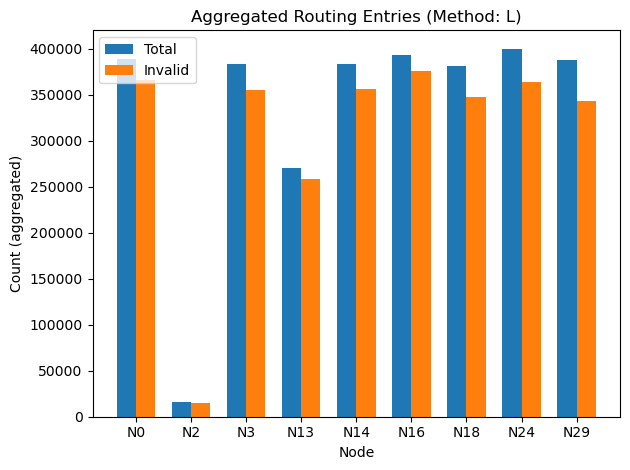


=== Method: P (Aggregated) ===
Node 0: Total=389743, Invalid=366332
Node 2: Total=381779, Invalid=357944
Node 3: Total=395993, Invalid=366519
Node 13: Total=266872, Invalid=254248
Node 14: Total=384381, Invalid=357553
Node 16: Total=389343, Invalid=372432
Node 18: Total=391212, Invalid=357141
Node 24: Total=406188, Invalid=369519
Node 29: Total=391074, Invalid=345847


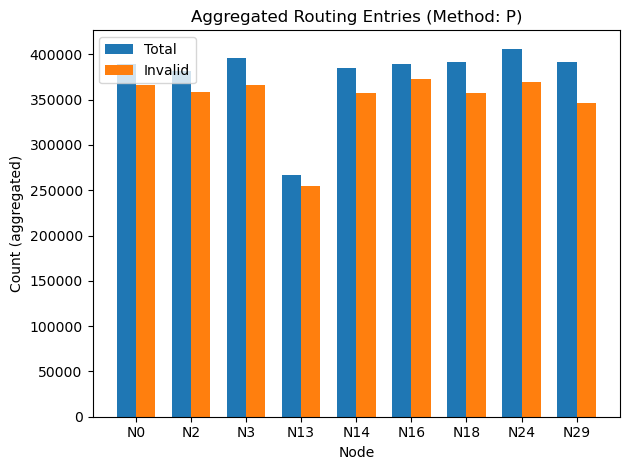

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

max_tx_dist = 150.0

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

position_log_path = "./vehicle_position_log.csv"
if not os.path.exists(position_log_path):
    print(f"Missing vehicle position log: {position_log_path}")
    exit(1)
df_pos_all = pd.read_csv(position_log_path)
time_list = sorted(df_pos_all["Time"].unique())

def parse_node_id(node_str):
    if isinstance(node_str, str) and "[" in node_str and "]" in node_str:
        return int(node_str.split("[")[1].split("]")[0])
    else:
        return None

for method in methods:
    print(f"\n=== Method: {method} (Aggregated) ===")
    totals, invalids, node_labels = [], [], []

    node_stats = {int(node[1:]): {"total": 0, "invalid": 0} for node in nodes}

    for target_time in time_list:
        df_pos = df_pos_all[df_pos_all["Time"] == target_time]
        if df_pos.empty:
            continue

        for node_folder in nodes:
            node_num = int(node_folder[1:])
            route_log_path = os.path.join(base_path, method, density, speed, node_folder, "routing_table_log.csv")
            
            if not os.path.exists(route_log_path):
                continue

            df_route = pd.read_csv(route_log_path)
            df_route = df_route[df_route["Time"] == target_time]
            if df_route.empty:
                continue

            for _, row in df_route.iterrows():
                next_id = parse_node_id(row["NextHop"])
                if next_id is None:
                    continue
                node_pos = df_pos[df_pos["Node"] == node_num]
                next_pos = df_pos[df_pos["Node"] == next_id]
                if node_pos.empty or next_pos.empty:
                    continue

                node_x, node_y = node_pos.iloc[0][["X", "Y"]]
                next_x, next_y = next_pos.iloc[0][["X", "Y"]]
                dist = sqrt((node_x - next_x)**2 + (node_y - next_y)**2)

                node_stats[node_num]["total"] += 1
                if dist > max_tx_dist:
                    node_stats[node_num]["invalid"] += 1

    for node_num in sorted(node_stats.keys()):
        t, inv = node_stats[node_num]["total"], node_stats[node_num]["invalid"]
        print(f"Node {node_num}: Total={t}, Invalid={inv}")
        totals.append(t)
        invalids.append(inv)
        node_labels.append(f"N{node_num}")

    if not totals:
        continue

    x = np.arange(len(node_labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, totals, width, label='Total')
    ax.bar(x + width/2, invalids, width, label='Invalid')

    ax.set_xlabel('Node')
    ax.set_ylabel('Count (aggregated)')
    ax.set_title(f'Aggregated Routing Entries (Method: {method})')
    ax.set_xticks(x)
    ax.set_xticklabels(node_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()



=== Method: L (Aggregated Ratio) ===
Node 0: InvalidRatio=84.3%
Node 2: InvalidRatio=89.5%
Node 3: InvalidRatio=86.3%
Node 13: InvalidRatio=83.3%
Node 14: InvalidRatio=85.0%
Node 16: InvalidRatio=90.1%
Node 18: InvalidRatio=80.7%
Node 24: InvalidRatio=83.4%
Node 29: InvalidRatio=77.8%

=== Method: P (Aggregated Ratio) ===
Node 0: InvalidRatio=84.2%
Node 2: InvalidRatio=88.1%
Node 3: InvalidRatio=86.4%
Node 13: InvalidRatio=83.1%
Node 14: InvalidRatio=84.9%
Node 16: InvalidRatio=90.0%
Node 18: InvalidRatio=80.8%
Node 24: InvalidRatio=83.3%
Node 29: InvalidRatio=77.8%


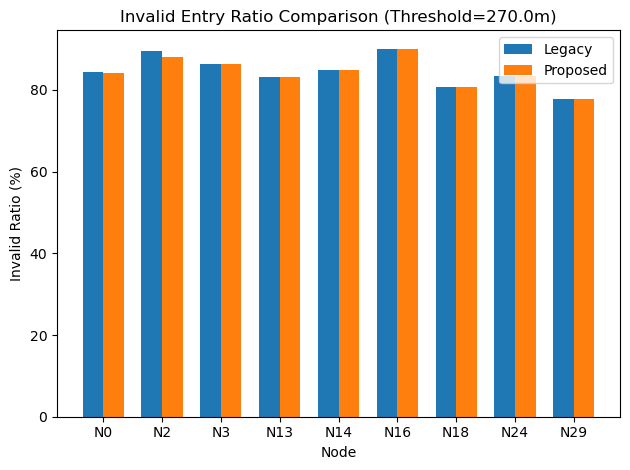

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

max_tx_dist = 270.0

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

position_log_path = "./vehicle_position_log.csv"
if not os.path.exists(position_log_path):
    print(f"Missing vehicle position log: {position_log_path}")
    exit(1)
df_pos_all = pd.read_csv(position_log_path)
time_list = sorted(df_pos_all["Time"].unique())

def parse_node_id(node_str):
    if isinstance(node_str, str) and "[" in node_str and "]" in node_str:
        return int(node_str.split("[")[1].split("]")[0])
    else:
        return None

results = {method: [] for method in methods}
node_labels = [f"N{int(n[1:])}" for n in nodes]

for method in methods:
    print(f"\n=== Method: {method} (Aggregated Ratio) ===")
    node_stats = {int(node[1:]): {"total": 0, "invalid": 0} for node in nodes}

    for target_time in time_list:
        df_pos = df_pos_all[df_pos_all["Time"] == target_time]
        if df_pos.empty:
            continue

        for node_folder in nodes:
            node_num = int(node_folder[1:])
            route_log_path = os.path.join(base_path, method, density, speed, node_folder, "routing_table_log.csv")
            if not os.path.exists(route_log_path):
                continue

            df_route = pd.read_csv(route_log_path)
            df_route = df_route[df_route["Time"] == target_time]
            if df_route.empty:
                continue

            for _, row in df_route.iterrows():
                next_id = parse_node_id(row["NextHop"])
                if next_id is None:
                    continue
                node_pos = df_pos[df_pos["Node"] == node_num]
                next_pos = df_pos[df_pos["Node"] == next_id]
                if node_pos.empty or next_pos.empty:
                    continue

                node_x, node_y = node_pos.iloc[0][["X", "Y"]]
                next_x, next_y = next_pos.iloc[0][["X", "Y"]]
                dist = sqrt((node_x - next_x)**2 + (node_y - next_y)**2)

                node_stats[node_num]["total"] += 1
                if dist > max_tx_dist:
                    node_stats[node_num]["invalid"] += 1

    invalid_ratios = []
    for node_num in sorted(node_stats.keys()):
        t, inv = node_stats[node_num]["total"], node_stats[node_num]["invalid"]
        ratio = (inv / t * 100) if t > 0 else 0
        print(f"Node {node_num}: InvalidRatio={ratio:.1f}%")
        invalid_ratios.append(ratio)
    results[method] = invalid_ratios

x = np.arange(len(node_labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, results["L"], width, label='Legacy')
ax.bar(x + width/2, results["P"], width, label='Proposed')

ax.set_xlabel('Node')
ax.set_ylabel('Invalid Ratio (%)')
ax.set_title(f'Invalid Entry Ratio Comparison (Threshold={max_tx_dist}m)')
ax.set_xticks(x)
ax.set_xticklabels(node_labels)
ax.legend()

plt.tight_layout()
plt.show()



=== Method: L (Aggregated Ratio) ===
Node 0: InvalidRatio=98.4%
Node 2: InvalidRatio=98.3%
Node 3: InvalidRatio=97.3%
Node 13: InvalidRatio=98.7%
Node 14: InvalidRatio=98.3%
Node 16: InvalidRatio=98.7%
Node 18: InvalidRatio=96.6%
Node 24: InvalidRatio=97.7%
Node 29: InvalidRatio=97.6%

=== Method: P (Aggregated Ratio) ===
Node 0: InvalidRatio=98.4%
Node 2: InvalidRatio=97.8%
Node 3: InvalidRatio=97.4%
Node 13: InvalidRatio=98.8%
Node 14: InvalidRatio=98.3%
Node 16: InvalidRatio=98.7%
Node 18: InvalidRatio=96.6%
Node 24: InvalidRatio=97.7%
Node 29: InvalidRatio=97.6%


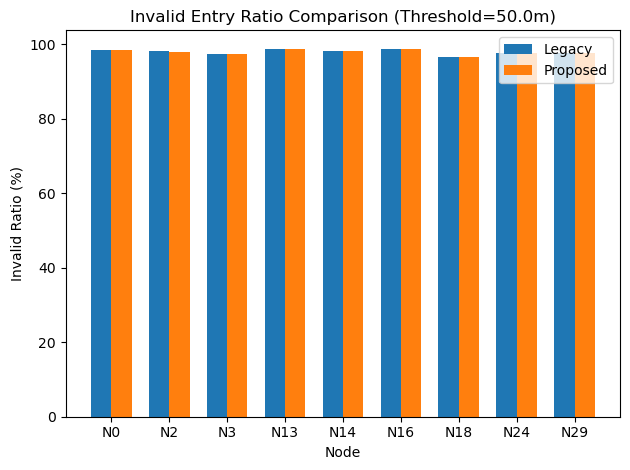

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

max_tx_dist = 50.0

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

position_log_path = "./vehicle_position_log.csv"
if not os.path.exists(position_log_path):
    print(f"Missing vehicle position log: {position_log_path}")
    exit(1)
df_pos_all = pd.read_csv(position_log_path)
time_list = sorted(df_pos_all["Time"].unique())

def parse_node_id(node_str):
    if isinstance(node_str, str) and "[" in node_str and "]" in node_str:
        return int(node_str.split("[")[1].split("]")[0])
    else:
        return None

results = {method: [] for method in methods}
node_labels = [f"N{int(n[1:])}" for n in nodes]

for method in methods:
    print(f"\n=== Method: {method} (Aggregated Ratio) ===")
    node_stats = {int(node[1:]): {"total": 0, "invalid": 0} for node in nodes}

    for target_time in time_list:
        df_pos = df_pos_all[df_pos_all["Time"] == target_time]
        if df_pos.empty:
            continue

        for node_folder in nodes:
            node_num = int(node_folder[1:])
            route_log_path = os.path.join(base_path, method, density, speed, node_folder, "routing_table_log.csv")
            if not os.path.exists(route_log_path):
                continue

            df_route = pd.read_csv(route_log_path)
            df_route = df_route[df_route["Time"] == target_time]
            if df_route.empty:
                continue

            for _, row in df_route.iterrows():
                next_id = parse_node_id(row["NextHop"])
                if next_id is None:
                    continue
                node_pos = df_pos[df_pos["Node"] == node_num]
                next_pos = df_pos[df_pos["Node"] == next_id]
                if node_pos.empty or next_pos.empty:
                    continue

                node_x, node_y = node_pos.iloc[0][["X", "Y"]]
                next_x, next_y = next_pos.iloc[0][["X", "Y"]]
                dist = sqrt((node_x - next_x)**2 + (node_y - next_y)**2)

                node_stats[node_num]["total"] += 1
                if dist > max_tx_dist:
                    node_stats[node_num]["invalid"] += 1

    invalid_ratios = []
    for node_num in sorted(node_stats.keys()):
        t, inv = node_stats[node_num]["total"], node_stats[node_num]["invalid"]
        ratio = (inv / t * 100) if t > 0 else 0
        print(f"Node {node_num}: InvalidRatio={ratio:.1f}%")
        invalid_ratios.append(ratio)
    results[method] = invalid_ratios

x = np.arange(len(node_labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, results["L"], width, label='Legacy')
ax.bar(x + width/2, results["P"], width, label='Proposed')

ax.set_xlabel('Node')
ax.set_ylabel('Invalid Ratio (%)')
ax.set_title(f'Invalid Entry Ratio Comparison (Threshold={max_tx_dist}m)')
ax.set_xticks(x)
ax.set_xticklabels(node_labels)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from multiprocessing import Pool, cpu_count

max_tx_dist = 270.0

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

position_log_path = "./vehicle_position_log.csv"
if not os.path.exists(position_log_path):
    print(f"Missing vehicle position log: {position_log_path}")
    exit(1)
df_pos_all = pd.read_csv(position_log_path)
time_list = sorted(df_pos_all["Time"].unique())

def parse_node_id(node_str):
    if isinstance(node_str, str) and "[" in node_str and "]" in node_str:
        return int(node_str.split("[")[1].split("]")[0])
    else:
        return None

def process_node(args):
    method, node_folder = args
    node_num = int(node_folder[1:])
    node_stat = {"node": node_num, "total": 0, "invalid": 0}
    for target_time in time_list:
        df_pos = df_pos_all[df_pos_all["Time"] == target_time]
        if df_pos.empty:
            continue

        route_log_path = os.path.join(base_path, method, density, speed, node_folder, "routing_table_log.csv")
        if not os.path.exists(route_log_path):
            continue

        df_route = pd.read_csv(route_log_path)
        df_route = df_route[df_route["Time"] == target_time]
        if df_route.empty:
            continue

        for _, row in df_route.iterrows():
            next_id = parse_node_id(row["NextHop"])
            if next_id is None:
                continue
            node_pos = df_pos[df_pos["Node"] == node_num]
            next_pos = df_pos[df_pos["Node"] == next_id]
            if node_pos.empty or next_pos.empty:
                continue

            node_x, node_y = node_pos.iloc[0][["X", "Y"]]
            next_x, next_y = next_pos.iloc[0][["X", "Y"]]
            dist = sqrt((node_x - next_x)**2 + (node_y - next_y)**2)

            node_stat["total"] += 1
            if dist > max_tx_dist:
                node_stat["invalid"] += 1
    return node_stat

results = {method: [] for method in methods}
node_labels = [f"N{int(n[1:])}" for n in nodes]

for method in methods:
    print(f"\n=== Method: {method} (Aggregated Ratio) ===")
    args_list = [(method, node) for node in nodes]
    with Pool(min(len(nodes), cpu_count())) as pool:
        stats_list = pool.map(process_node, args_list)
    invalid_ratios = []
    for stat in sorted(stats_list, key=lambda x: x["node"]):
        t, inv = stat["total"], stat["invalid"]
        ratio = (inv / t * 100) if t > 0 else 0
        print(f"Node {stat['node']}: InvalidRatio={ratio:.1f}%")
        invalid_ratios.append(ratio)
    results[method] = invalid_ratios

x = np.arange(len(node_labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, results["L"], width, label='Legacy')
ax.bar(x + width/2, results["P"], width, label='Proposed')

ax.set_xlabel('Node')
ax.set_ylabel('Invalid Ratio (%)')
ax.set_title(f'Invalid Entry Ratio Comparison (Threshold={max_tx_dist}m)')
ax.set_xticks(x)
ax.set_xticklabels(node_labels)
ax.legend()

plt.tight_layout()
plt.show()



=== Method: L (Aggregated Ratio) ===


In [2]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]

for node_folder in nodes:
    node_num = int(node_folder[1:])
    l_path = os.path.join(base_path, "L", density, speed, node_folder, "routing_table_log.csv")
    p_path = os.path.join(base_path, "P", density, speed, node_folder, "routing_table_log.csv")

    if not (os.path.exists(l_path) and os.path.exists(p_path)):
        print(f"Missing routing log for node {node_num}")
        continue

    df_l = pd.read_csv(l_path)
    df_p = pd.read_csv(p_path)

    df_l["key"] = df_l["Time"].astype(str) + "_" + df_l["Destination"]
    df_p["key"] = df_p["Time"].astype(str) + "_" + df_p["Destination"]

    merged = pd.merge(df_l[["key", "NextHop"]], df_p[["key", "NextHop"]],
                      on="key", how="inner", suffixes=('_L', '_P'))

    same_count = (merged["NextHop_L"] == merged["NextHop_P"]).sum()
    diff_count = len(merged) - same_count

    print(f"Node {node_num}: Same={same_count}, Diff={diff_count}, Compared={len(merged)}")


Node 0: Same=10513545, Diff=3277014, Compared=13790559
Node 2: Same=222551, Diff=23286, Compared=245837
Node 3: Same=10161227, Diff=4032613, Compared=14193840
Node 13: Same=10287315, Diff=2903220, Compared=13190535
Node 14: Same=10476786, Diff=1156199, Compared=11632985
Node 16: Same=10309001, Diff=2399318, Compared=12708319
Node 18: Same=10119639, Diff=4565412, Compared=14685051
Node 24: Same=10080341, Diff=6677557, Compared=16757898
Node 29: Same=10310087, Diff=3182129, Compared=13492216
